In [5]:
%matplotlib inline
from itertools import chain
import itertools
from time import time
from datetime import datetime, date, timedelta
from collections import namedtuple
from operator import attrgetter
# Fast array operations
import numpy as np
import pandas
from dataclasses import dataclass
# ML
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support,
    SCORERS, f1_score, 
)
from sklearn.model_selection import (
    GridSearchCV, RepeatedStratifiedKFold, cross_val_score, 
    cross_validate, ShuffleSplit, KFold, StratifiedKFold,
    
)
from sklearn.pipeline import Pipeline
# Graphs
import mpld3
import mplcursors
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Database
from sqlalchemy import select
from sqlalchemy.orm import scoped_session
# From backend
from infrastructure.database import LocalSession
from infrastructure.models import *
from domain.risk.models import NewRisk
from domain.user.models import user_full_name
from domain.auth.models import AuthUser
from domain.shared.models import ObjectiveStatus,RelatedItem
# Classfication code
from domain.risk.infrastructure.modelling.generation import RiskClassificationMixin, RiskModelBuilderMixin

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

session = LocalSession()
@dataclass
class Modelling(RiskClassificationMixin, RiskModelBuilderMixin):
    _session: scoped_session
modelling = Modelling(_session=session)
df = pandas.read_csv("./notebook-media/randomized-dataset.csv")



x_train = modelling.impact_x(train)
x_test = modelling.impact_x(test)
y_train = modelling.impact_y(train)
labels = modelling.as_label(y_train)
y_test = modelling.impact_y(test)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
lbl_encoder = LabelEncoder()
y_train = lbl_encoder.fit_transform(y_train)
y_test = lbl_encoder.transform(y_test)

print(x_train.shape)
def base_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=3, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(len(labels), activation='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

Automatically created module for IPython interactive environment


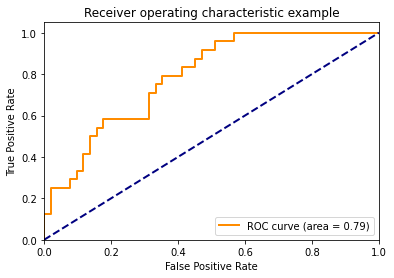

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()